In [ ]:
"""
knowledge graph contains:
(
    country1, 
    relation -> commodity traded for year T, 
    country2
)
feature vector -> trade volume for year T

so countries are connected if same commodity are traded
"""

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import os

In [9]:
# config
root = "./data/"
T = 2016
c = 2
all_cols = ["Year", "Commodity Code", "Commodity", "Trade Value (US$)"]

def sep(i=50):
    print("-"*i)

In [3]:
with open("./lists/country_names_a_m.pkl", "rb") as f:
    a_m = pickle.load(f)

with open("./lists/country_names_n_z.pkl", "rb") as f:
    n_z = pickle.load(f)

with open("./lists/country_names_a_z.pkl", "rb") as f:
    country_names = pickle.load(f)

with open('./lists/commodities.pkl', 'rb') as f:
    commodities = pickle.load(f)

In [7]:
df_a_m = pd.read_excel(root + "A-M Master File(00-28).xlsx", sheet_name=a_m)
df_n_z = pd.read_excel(root + "N-Z Master File(00-28).xlsx", sheet_name=n_z)

df_a_z = dict(df_a_m)
df_a_z.update(df_n_z)

del df_a_m, df_n_z

# filter out commodities
for k, df in df_a_z.items():
    df_a_z[k] = df[all_cols]

print(f"Each df shape: (_, {df_a_z['Afghanistan'].shape[1]})")
print(f"Number of countries: {len(df_a_z)}")
print(f"Number of commodities: {len(commodities)}")

Each df shape: (_, 4)
Number of countries: 180
Number of commodities: 20


In [10]:
comm2 = pd.DataFrame([], columns=all_cols)
for k, df in df_a_z.items():
    df = df.loc[df["Commodity Code"] == c]
    print(df)
    sep(50)

    Year  Commodity Code                 Commodity  Trade Value (US$)
0   2008               2  DAIRY PRODUCTS,BIRD EGGS             176592
5   2009               2  DAIRY PRODUCTS,BIRD EGGS             157494
11  2010               2  DAIRY PRODUCTS,BIRD EGGS              35977
17  2011               2  DAIRY PRODUCTS,BIRD EGGS             217289
29  2015               2  DAIRY PRODUCTS,BIRD EGGS             120515
39  2016               2  DAIRY PRODUCTS,BIRD EGGS             200173
51  2017               2  DAIRY PRODUCTS,BIRD EGGS              59590
66  2018               2  DAIRY PRODUCTS,BIRD EGGS              57799
81  2019               2  DAIRY PRODUCTS,BIRD EGGS              55781
--------------------------------------------------
     Year  Commodity Code                 Commodity  Trade Value (US$)
2    1996               2  DAIRY PRODUCTS,BIRD EGGS                845
58   1999               2  DAIRY PRODUCTS,BIRD EGGS              25572
76   2000               2  DAIRY PRO

In [1]:
import numpy as np
import networkx as nx

In [2]:
g = nx.Graph()

In [26]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from scipy.linalg import inv, sqrtm
from matplotlib import animation

In [2]:
"""
countries: a,b,c,d,e,
commodities: c1, c2, c3
year: T
volume traded = {
    a: va1, va2, va3,
    b: vb1, vb2, vb3,
    c: vc1, vc2, vc3,
    d: vd1, vd2, vd3,
    e: ve1, ve2, ve3,
    f: vf1, vf2, vf3,
}
"""


In [10]:
X = np.random.randint(0, 50, (6, 3))

A = [
    [0,1,1,1,1,1],
    [1,0,1,0,0,0],
    [1,1,0,0,0,0],
    [1,0,0,0,1,0],
    [1,0,0,1,0,0],
    [1,0,0,0,0,0]
]

I = np.eye(len(A))

A = np.array(A)
A_mod = A + I

In [3]:
D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

In [4]:
print(f"A_mod = \n{A_mod}\n")
print(f"D_mod = \n{D_mod}\n")
print(f"X = \n{X}\n")

A_mod = 
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]

D_mod = 
[[6. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 2.]]

X = 
[[ 2 41 36]
 [ 3 19 39]
 [48 33 36]
 [20 30  5]
 [16 39  3]
 [48 49 44]]



In [5]:
# spectral normalization
D_mod_invroot = inv(sqrtm(D_mod))
A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
print(A_hat)

[[0.16666667 0.23570226 0.23570226 0.23570226 0.23570226 0.28867513]
 [0.23570226 0.33333333 0.33333333 0.         0.         0.        ]
 [0.23570226 0.33333333 0.33333333 0.         0.         0.        ]
 [0.23570226 0.         0.         0.33333333 0.33333333 0.        ]
 [0.23570226 0.         0.         0.33333333 0.33333333 0.        ]
 [0.28867513 0.         0.         0.         0.         0.5       ]]


In [54]:
print(A_hat @ X)

[[26.40959017 21.27939719 45.48290103]
 [13.50203222 17.20220057 32.96649831]
 [13.50203222 17.20220057 32.96649831]
 [15.16869888 15.20220057 23.63316498]
 [15.16869888 15.20220057 23.63316498]
 [27.3715789   5.83012702 17.54145188]]


In [29]:
results = [X]

In [30]:
for i in range(10):
    X = A_hat @ X
    results.append(X)

In [31]:
print(results[0])
print()
print(results[-1])

[[25.74201111 34.69780719 34.78750995]
 [18.37771996 24.5064656  24.81473917]
 [18.37771996 24.5064656  24.81473917]
 [18.00487706 24.54981942 24.37253015]
 [18.00487706 24.54981942 24.37253015]
 [14.89137007 20.05105507 20.09738973]]

[[25.73770193 34.69511148 34.78561796]
 [18.20251338 24.53275829 24.60097053]
 [18.20251338 24.53275829 24.60097053]
 [18.19604771 24.53351011 24.59330195]
 [18.19604771 24.53351011 24.59330195]
 [14.85972998 20.03127    20.08351258]]


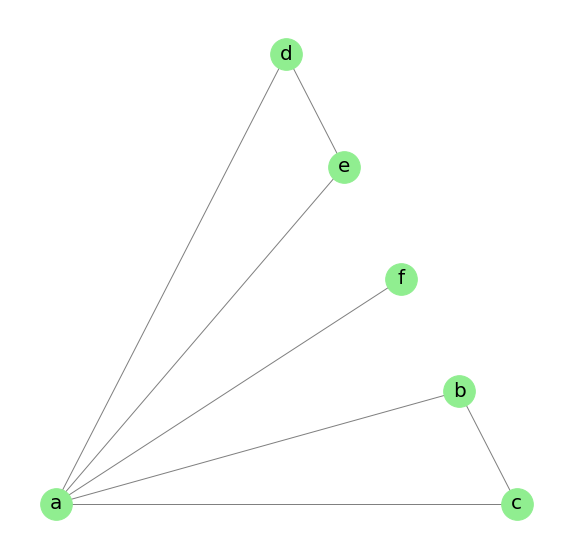

In [32]:
rows, cols = np.where(A == 1)
edges = zip(rows.tolist(), cols.tolist())
node_labels = {i: chr(ord("a")+i) for i in range(g.number_of_nodes())}
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.planar_layout(g)

fig, ax = plt.subplots(figsize=(10,10))
nx.draw(
    g, pos, with_labels=True, 
    labels=node_labels, node_color='lightgreen',
    ax=ax, edge_color='gray', node_size=1000, font_size=20
)

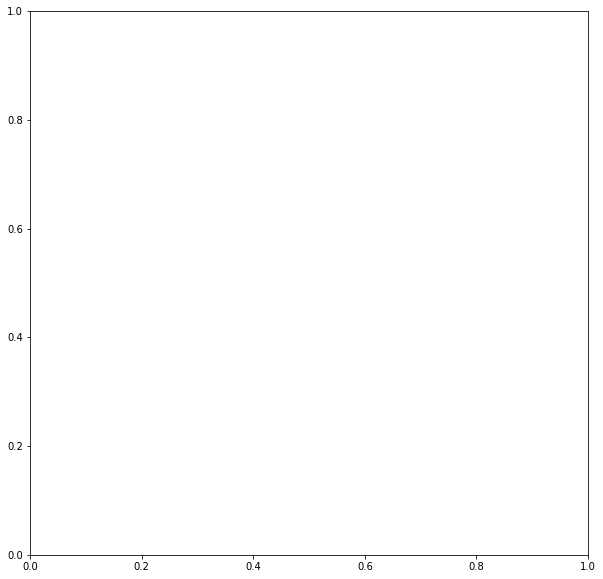

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

kwargs = {'cmap': 'hot', 'node_size': 1500, 'edge_color': 'gray', 
          'vmin': np.array(results).min(), 
          'vmax': np.array(results).max()*1.1}

def update(idx):
    ax.clear()
    colors = results[idx]
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)
    ax.set_title(f'Iteration {idx+1}', fontsize=20)

In [44]:
def get_hex(P):
    P = P.sum(axis=1)
    color_hex_values = [hex(int(e*255/100))[2:] for e in P]
    return [f"#00{hv}00" for hv in color_hex_values]

In [71]:
for r in results:
    print(r)
    print("-"*50)

[[25.74201111 34.69780719 34.78750995]
 [18.37771996 24.5064656  24.81473917]
 [18.37771996 24.5064656  24.81473917]
 [18.00487706 24.54981942 24.37253015]
 [18.00487706 24.54981942 24.37253015]
 [14.89137007 20.05105507 20.09738973]]
--------------------------------------------------
[[25.74002416 34.69656342 34.78663613]
 [18.31926351 24.51599532 24.74265417]
 [18.31926351 24.51599532 24.74265417]
 [18.07070158 24.54489787 24.44784816]
 [18.07070158 24.54489787 24.44784816]
 [14.87676356 20.0419217  20.09098399]]
--------------------------------------------------
[[25.73894981 34.69589185 34.78616538]
 [18.27982422 24.5220553  24.69439155]
 [18.27982422 24.5220553  24.69439155]
 [18.11411627 24.54132367 24.49785421]
 [18.11411627 24.54132367 24.49785421]
 [14.86888672 20.03699596 20.08752886]]
--------------------------------------------------
[[25.73837092 34.6955298  34.78591137]
 [18.25327813 24.52593701 24.66210551]
 [18.25327813 24.52593701 24.66210551]
 [18.14280616 24.53878258

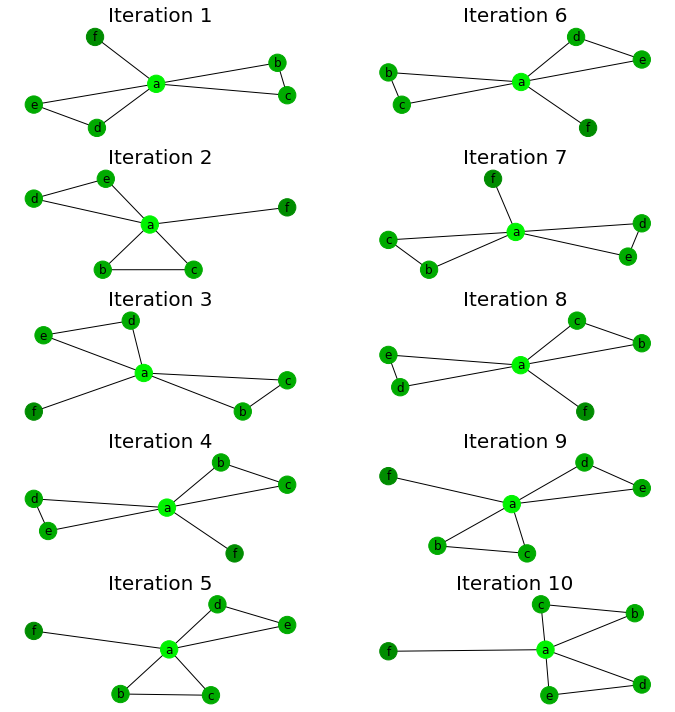

In [69]:
fig, ax = plt.subplots(5, 2, figsize=(10,10))
fig.tight_layout()

for i in range(10):
    axt = ax[i%5, i//5]
    axt.set_title(f'Iteration {i+1}', fontsize=20)

    nx.draw(
        g, with_labels=True, labels=node_labels,
        node_color=get_hex(results[i]), ax=axt
    )
plt.show()